# PA 2: Classification - Decision Tree

## Student Details (1 Point)

First Student Name and ID: SANJANA KONDABATHINI (1001984312)

Second Student Name and ID: MEGHANA KADALI (1002027499)

Third Student Name and ID: MUCHARLA RAJASHEKAR (1002027966)

Notes: When submitting, fill your name and ID in this cell.  [1 point]

Make sure to write about any 4-5 line to explain any kind of visualization

Do not to forget to cite any external sources used by you.

## Programming Assignment Details (7 Points)


For this assignment use Jupyter notebook, Panda, and scikit.

1) Load dataset_DT_NB.csv  [1 points]

### Features:

* Age | Objective Feature | age |
* Height | Objective Feature | height | 
* Weight | Objective Feature | weight | 
* Gender | Objective Feature | gender |  
* Systolic blood pressure | Examination Feature | ap_hi | 
* Diastolic blood pressure | Examination Feature | ap_lo | 
* Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
* Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
* Smoking | Subjective Feature | smoke | 
* Alcohol intake | Subjective Feature | alco | 
* Physical activity | Subjective Feature | active | 
* Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.

Split your dataset 75% for training, and 25% for testing the classifier.  [2 points]

## Extra points will be given for adequately explained preprocessing and high accuracy above 70%(up to 10 points)

### Hints - 

1) To compress the data, numerous columns might be combined into one feature.

2) Categorized Data is preferable for decision trees.

3) Unwanted data can reduce the model's accuracy.

In [1]:
import pandas as pd
import sklearn
import csv
import numpy as np
#additional package
#install (pip install dtreeviz)
import dtreeviz.trees

import matplotlib.pyplot as p
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB , BernoulliNB
from sklearn.naive_bayes import ComplementNB
from sklearn import metrics
from sklearn.datasets import make_classification


In [2]:
df_data=pd.read_csv('dataset_DT_NB.csv', sep=';')
df_data.head( )

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
#detailed discription of dataset using describe()

df_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


In [4]:
#checking if there are any missing values present in the dataset using isnull()

print(f"Missing values : {df_data.isnull().sum().any()}")
print(df_data.shape)

Missing values : False
(70000, 13)


In [5]:
#Categorized Data is preferable for decision trees.
#droping ID and converting age to years
#converting blood pressure
df = df_data
df = df.drop(['id'], axis=1)
df['age'] = df['age']/365

#It is possible to merge weight and height to get BMI 
df['BMI'] = np.round(df['weight']/np.square(df['height']/100),1)
df = df.drop(['weight', 'height'], axis=1)
df.head()
df = df[(df["BMI"]>10) & (df["BMI"]<100)]
df = df[(df["ap_hi"]>20) & (df["ap_hi"]<250)]
df = df[(df["ap_lo"]>20) & (df["ap_lo"]<200)]
print(df.shape)

(68749, 11)


In [6]:
# numeric values in cholestrol, glucose are converted  to text
# Next Create Dummy Variable for Cholestrol and glucose
df['cholesterol'] = df['cholesterol'].map({ 1: 'Normal', 2: 'AboveNormal', 3: 'WellAboveNormal'})
df['gluc']=df['gluc'].map({ 1: 'Normal', 2: 'AboveNormal', 3: 'WellAboveNormal'})
dup = pd.get_dummies(df[['cholesterol','gluc']])
df = pd.concat([df,dup],axis=1)

In [7]:
df.drop(['cholesterol','gluc'],axis=1,inplace=True)
df.head()

,age,gender,ap_hi,ap_lo,smoke,alco,active,cardio,BMI,cholesterol_AboveNormal,cholesterol_Normal,cholesterol_WellAboveNormal,gluc_AboveNormal,gluc_Normal,gluc_WellAboveNormal
0,50.391781,2,110,80,0,0,1,0,22.0,0,1,0,0,1,0
1,55.419178,1,140,90,0,0,1,1,34.9,0,0,1,0,1,0
2,51.663014,1,130,70,0,0,0,1,23.5,0,0,1,0,1,0
3,48.282192,2,150,100,0,0,1,1,28.7,0,1,0,0,1,0
4,47.873973,1,100,60,0,0,0,0,23.0,0,1,0,0,1,0


In [8]:
#round up to 0 and 1
df["gender"] = df["gender"] % 2
df.head()

,age,gender,ap_hi,ap_lo,smoke,alco,active,cardio,BMI,cholesterol_AboveNormal,cholesterol_Normal,cholesterol_WellAboveNormal,gluc_AboveNormal,gluc_Normal,gluc_WellAboveNormal
0,50.391781,0,110,80,0,0,1,0,22.0,0,1,0,0,1,0
1,55.419178,1,140,90,0,0,1,1,34.9,0,0,1,0,1,0
2,51.663014,1,130,70,0,0,0,1,23.5,0,0,1,0,1,0
3,48.282192,0,150,100,0,0,1,1,28.7,0,1,0,0,1,0
4,47.873973,1,100,60,0,0,0,0,23.0,0,1,0,0,1,0


In [9]:
#Concate the Non Categorical features (age,Systolic blood pressure, Diastolic blood pressure and BMI) with the categoral features using scaling function

def Scaling_fn(dat, scaler):
  non_categorical = ['age', 'ap_hi', 'ap_lo', 'BMI']
  # Normalizing non-categorical data 
  dat[non_categorical] = scaler.fit_transform(dat[non_categorical])
  return dat

# DecisionTree (15 Points)

1) Use gini and entropy to measure the quality of a split.  [2 points]

2) Use comments to explain your code and variable names. [1 point]

3) Determine four most influential attributes on target attribute (with explanation) [5 points]

3) Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support. [2 points]

4) Print the decision tree visualization with depth of 4, 5.  [5 points]

In [10]:
B = df['cardio'] # assigning particular columns to varaible A and B for the creation of model
A = df.drop(['cardio'], axis=1)
A_train, A_test, B_train, B_test = train_test_split(A,B, test_size=0.25, random_state=0) # splitting the data in to 70% for training, 20% for validation and 10% for testing

In [11]:
A_train

,age,gender,ap_hi,ap_lo,smoke,alco,active,BMI,cholesterol_AboveNormal,cholesterol_Normal,cholesterol_WellAboveNormal,gluc_AboveNormal,gluc_Normal,gluc_WellAboveNormal
62698,54.249315,1,150,100,0,0,1,32.0,0,0,1,0,0,1
55598,49.857534,1,110,70,0,0,1,29.7,0,1,0,0,1,0
56216,57.698630,1,120,80,0,0,0,26.4,0,1,0,0,1,0
23972,59.846575,0,150,90,1,0,0,25.2,1,0,0,0,1,0
17966,45.572603,1,120,80,0,0,1,29.4,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21634,62.153425,0,150,90,0,1,1,27.7,0,1,0,0,1,0
46728,49.876712,1,100,80,0,0,1,23.9,0,1,0,0,1,0
43391,52.621918,0,110,70,0,1,0,21.9,0,1,0,0,1,0
44358,50.454795,1,140,90,0,0,1,23.9,0,1,0,0,1,0


In [12]:
B_train

62698    1
55598    1
56216    0
23972    1
17966    0
        ..
21634    1
46728    0
43391    0
44358    1
69510    1
Name: cardio, Length: 51561, dtype: int64

In [13]:
A_test

,age,gender,ap_hi,ap_lo,smoke,alco,active,BMI,cholesterol_AboveNormal,cholesterol_Normal,cholesterol_WellAboveNormal,gluc_AboveNormal,gluc_Normal,gluc_WellAboveNormal
32210,62.463014,0,120,80,0,0,0,27.3,0,1,0,1,0,0
11709,50.493151,1,120,80,0,0,1,27.3,0,1,0,0,1,0
55752,53.750685,1,130,80,0,0,1,29.4,0,1,0,0,1,0
13734,52.605479,1,120,80,0,0,1,29.2,0,1,0,0,1,0
40233,45.687671,1,110,70,0,0,1,23.2,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62577,58.197260,0,140,90,0,0,1,23.4,0,1,0,0,1,0
65881,52.189041,1,120,80,0,0,1,28.1,0,1,0,0,1,0
27875,57.624658,1,120,80,0,0,1,26.9,1,0,0,0,0,1
35003,53.742466,1,110,70,0,0,1,24.2,0,1,0,0,1,0


In [14]:
B_test

32210    1
11709    0
55752    0
13734    0
40233    0
        ..
62577    1
65881    0
27875    1
35003    0
10870    1
Name: cardio, Length: 17188, dtype: int64

# DecisionTree (15 Points)

1) Use gini and entropy to measure the quality of a split.  [2 points]

2) Use comments to explain your code and variable names. [1 point]

3) Determine four most influential attributes on target attribute (with explanation) [5 points]

3) Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support. [2 points]

4) Print the decision tree visualization with depth of 4, 5.  [5 points]

Accuracy with Gini as hyper Parameter:  72.41680242029322


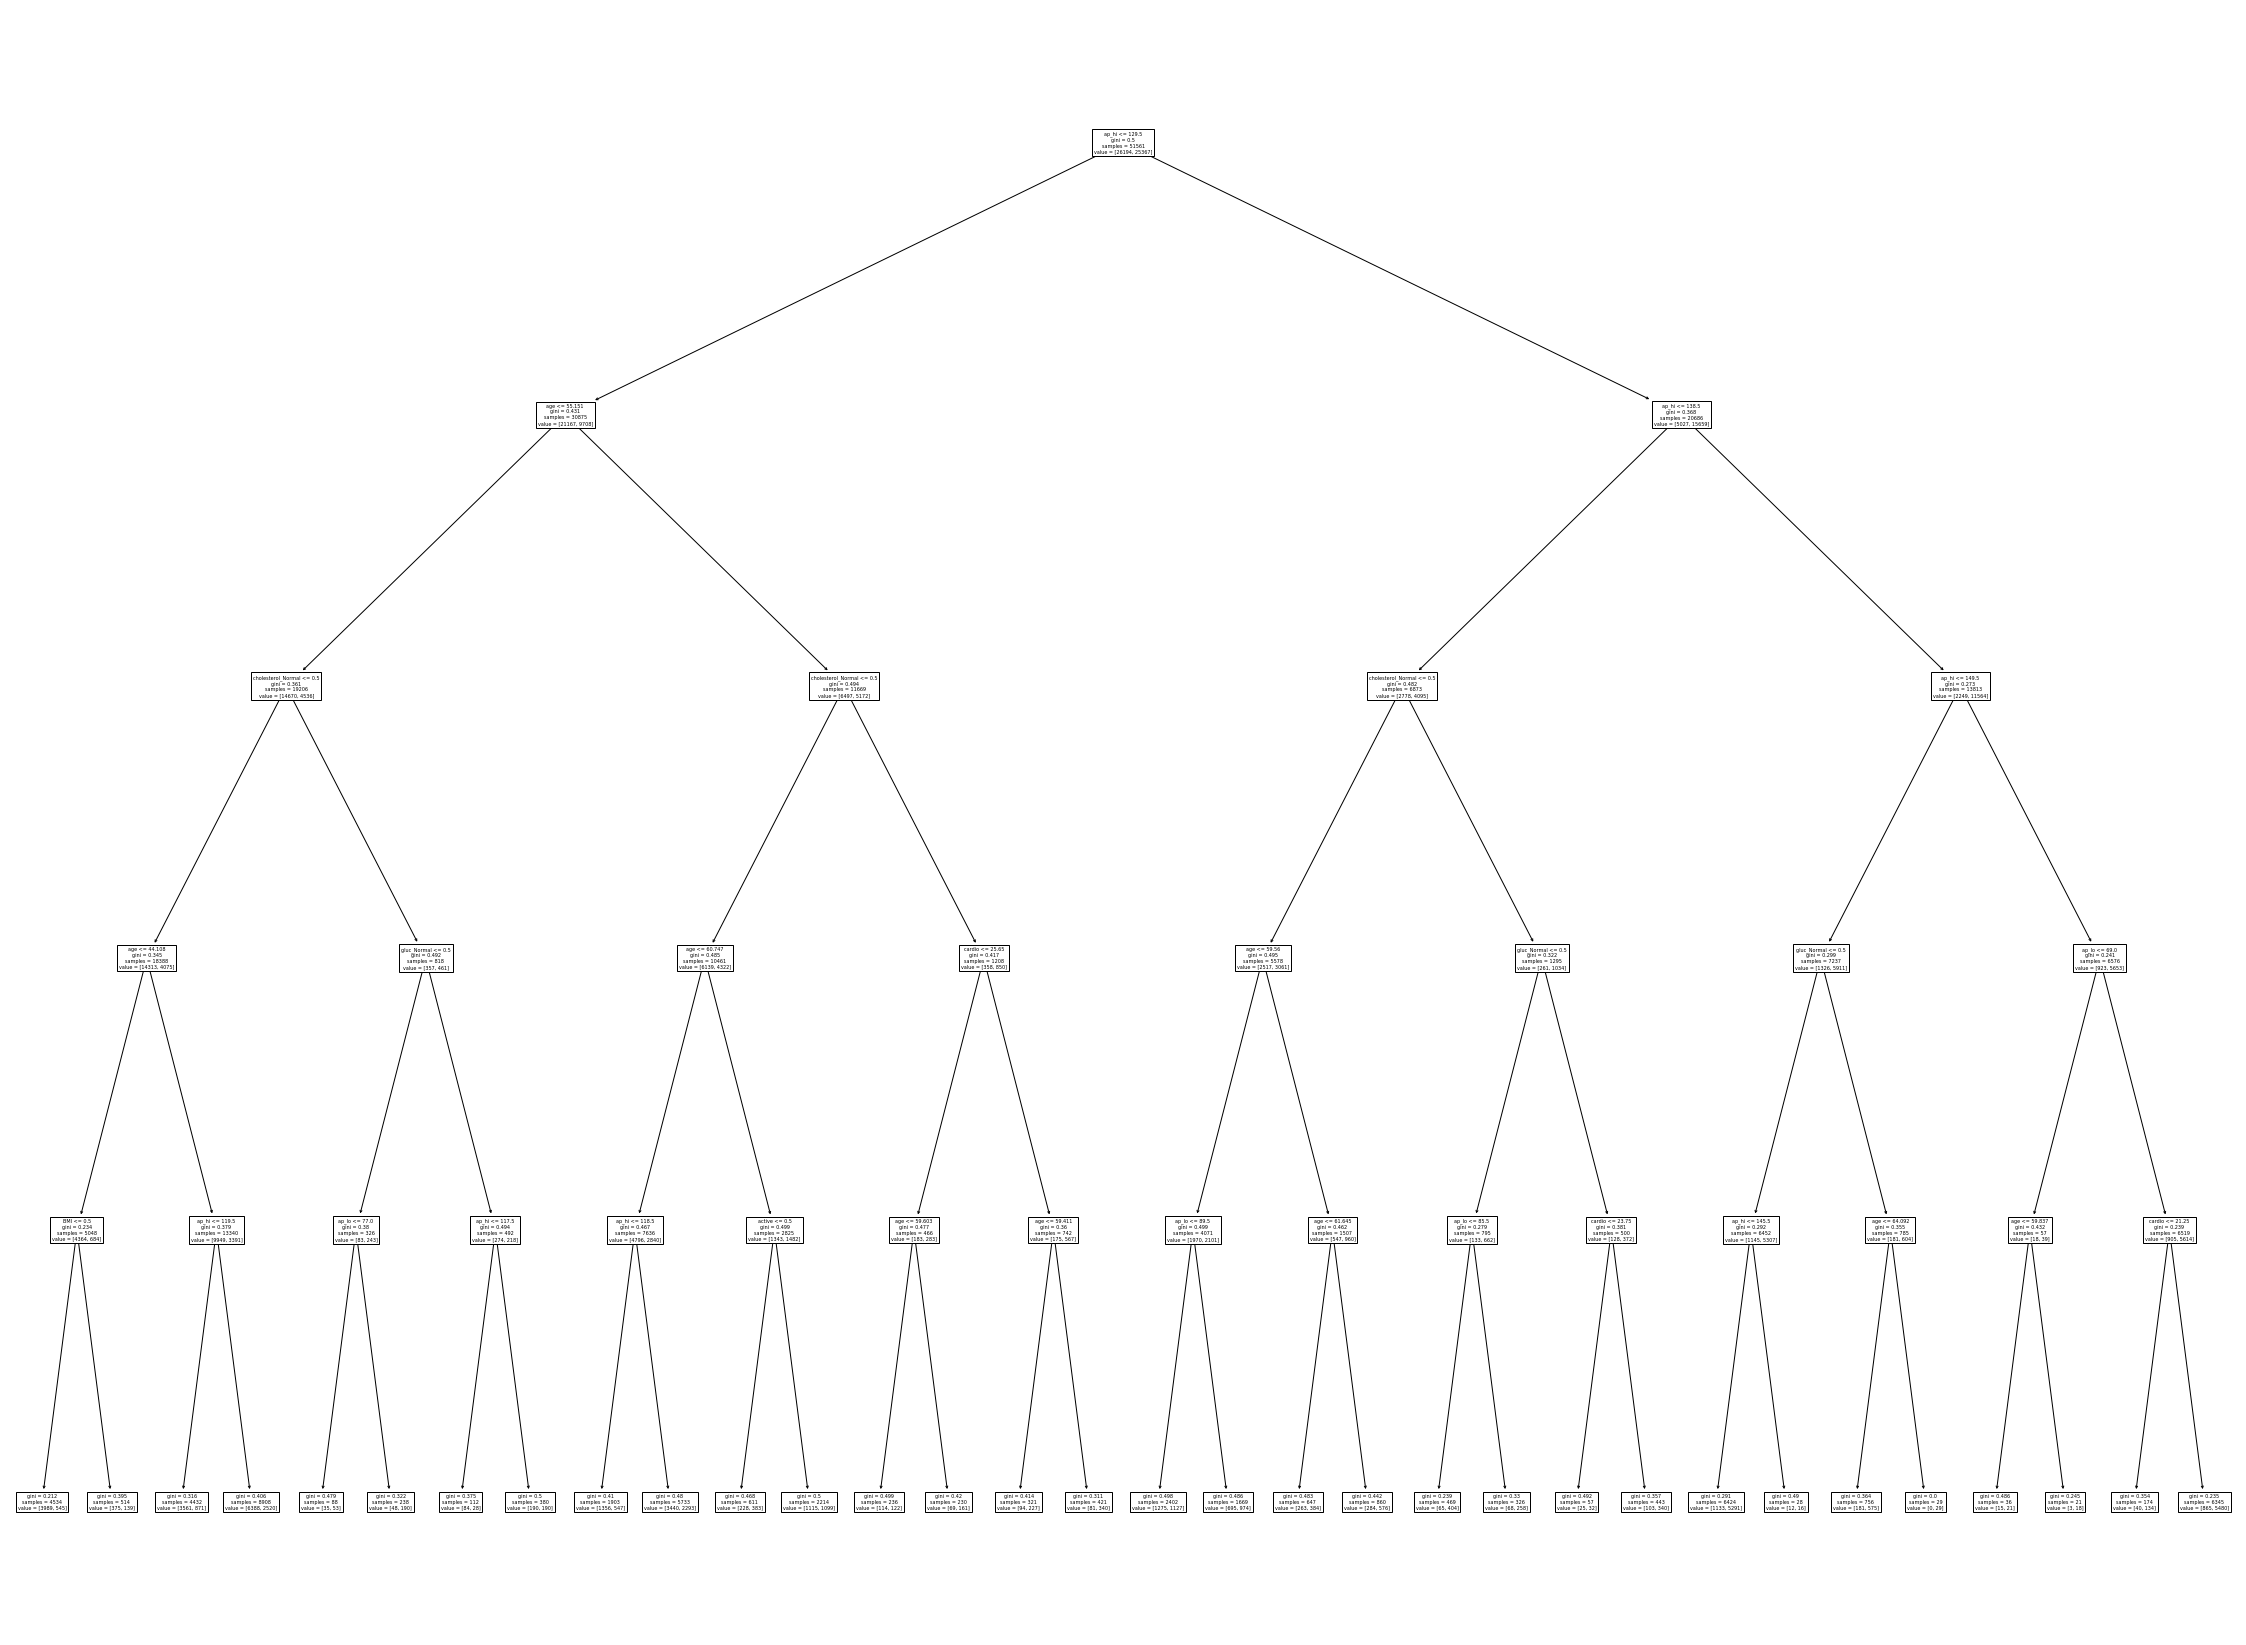

In [15]:
#From the above train and test data we can determine the Decision tree using GINI with depth level 5
Decisiontree = tree.DecisionTreeClassifier(max_depth=5,criterion='gini') 
Decisiontree = Decisiontree.fit(A_train,B_train)
B_pred_Gini=Decisiontree.predict(A_test)
fn = list(df.columns)
fig = p.subplots(figsize = (40,30))
print("Accuracy with Gini as hyper Parameter: ",Decisiontree.score(A_test,B_test, sample_weight=None)*100)
tree.plot_tree(Decisiontree, feature_names = fn);
                  

# DecisionTree (15 Points)

1) Use gini and entropy to measure the quality of a split.  [2 points]

2) Use comments to explain your code and variable names. [1 point]

3) Determine four most influential attributes on target attribute (with explanation) [5 points]

3) Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support. [2 points]

4) Print the decision tree visualization with depth of 4, 5.  [5 points]

In [16]:
#confusion matrix
confusion_matrix_gini=confusion_matrix(B_test, B_pred_Gini)
class_names = ['class 0', 'class 1']
print(confusion_matrix_gini)
print(classification_report(B_test, B_pred_Gini, target_names=class_names))

[[7033 1497]
 [3244 5414]]
              precision    recall  f1-score   support

     class 0       0.68      0.82      0.75      8530
     class 1       0.78      0.63      0.70      8658

    accuracy                           0.72     17188
   macro avg       0.73      0.72      0.72     17188
weighted avg       0.73      0.72      0.72     17188



Accuracy with Gini as hyper Parameter: :  72.43425645799395


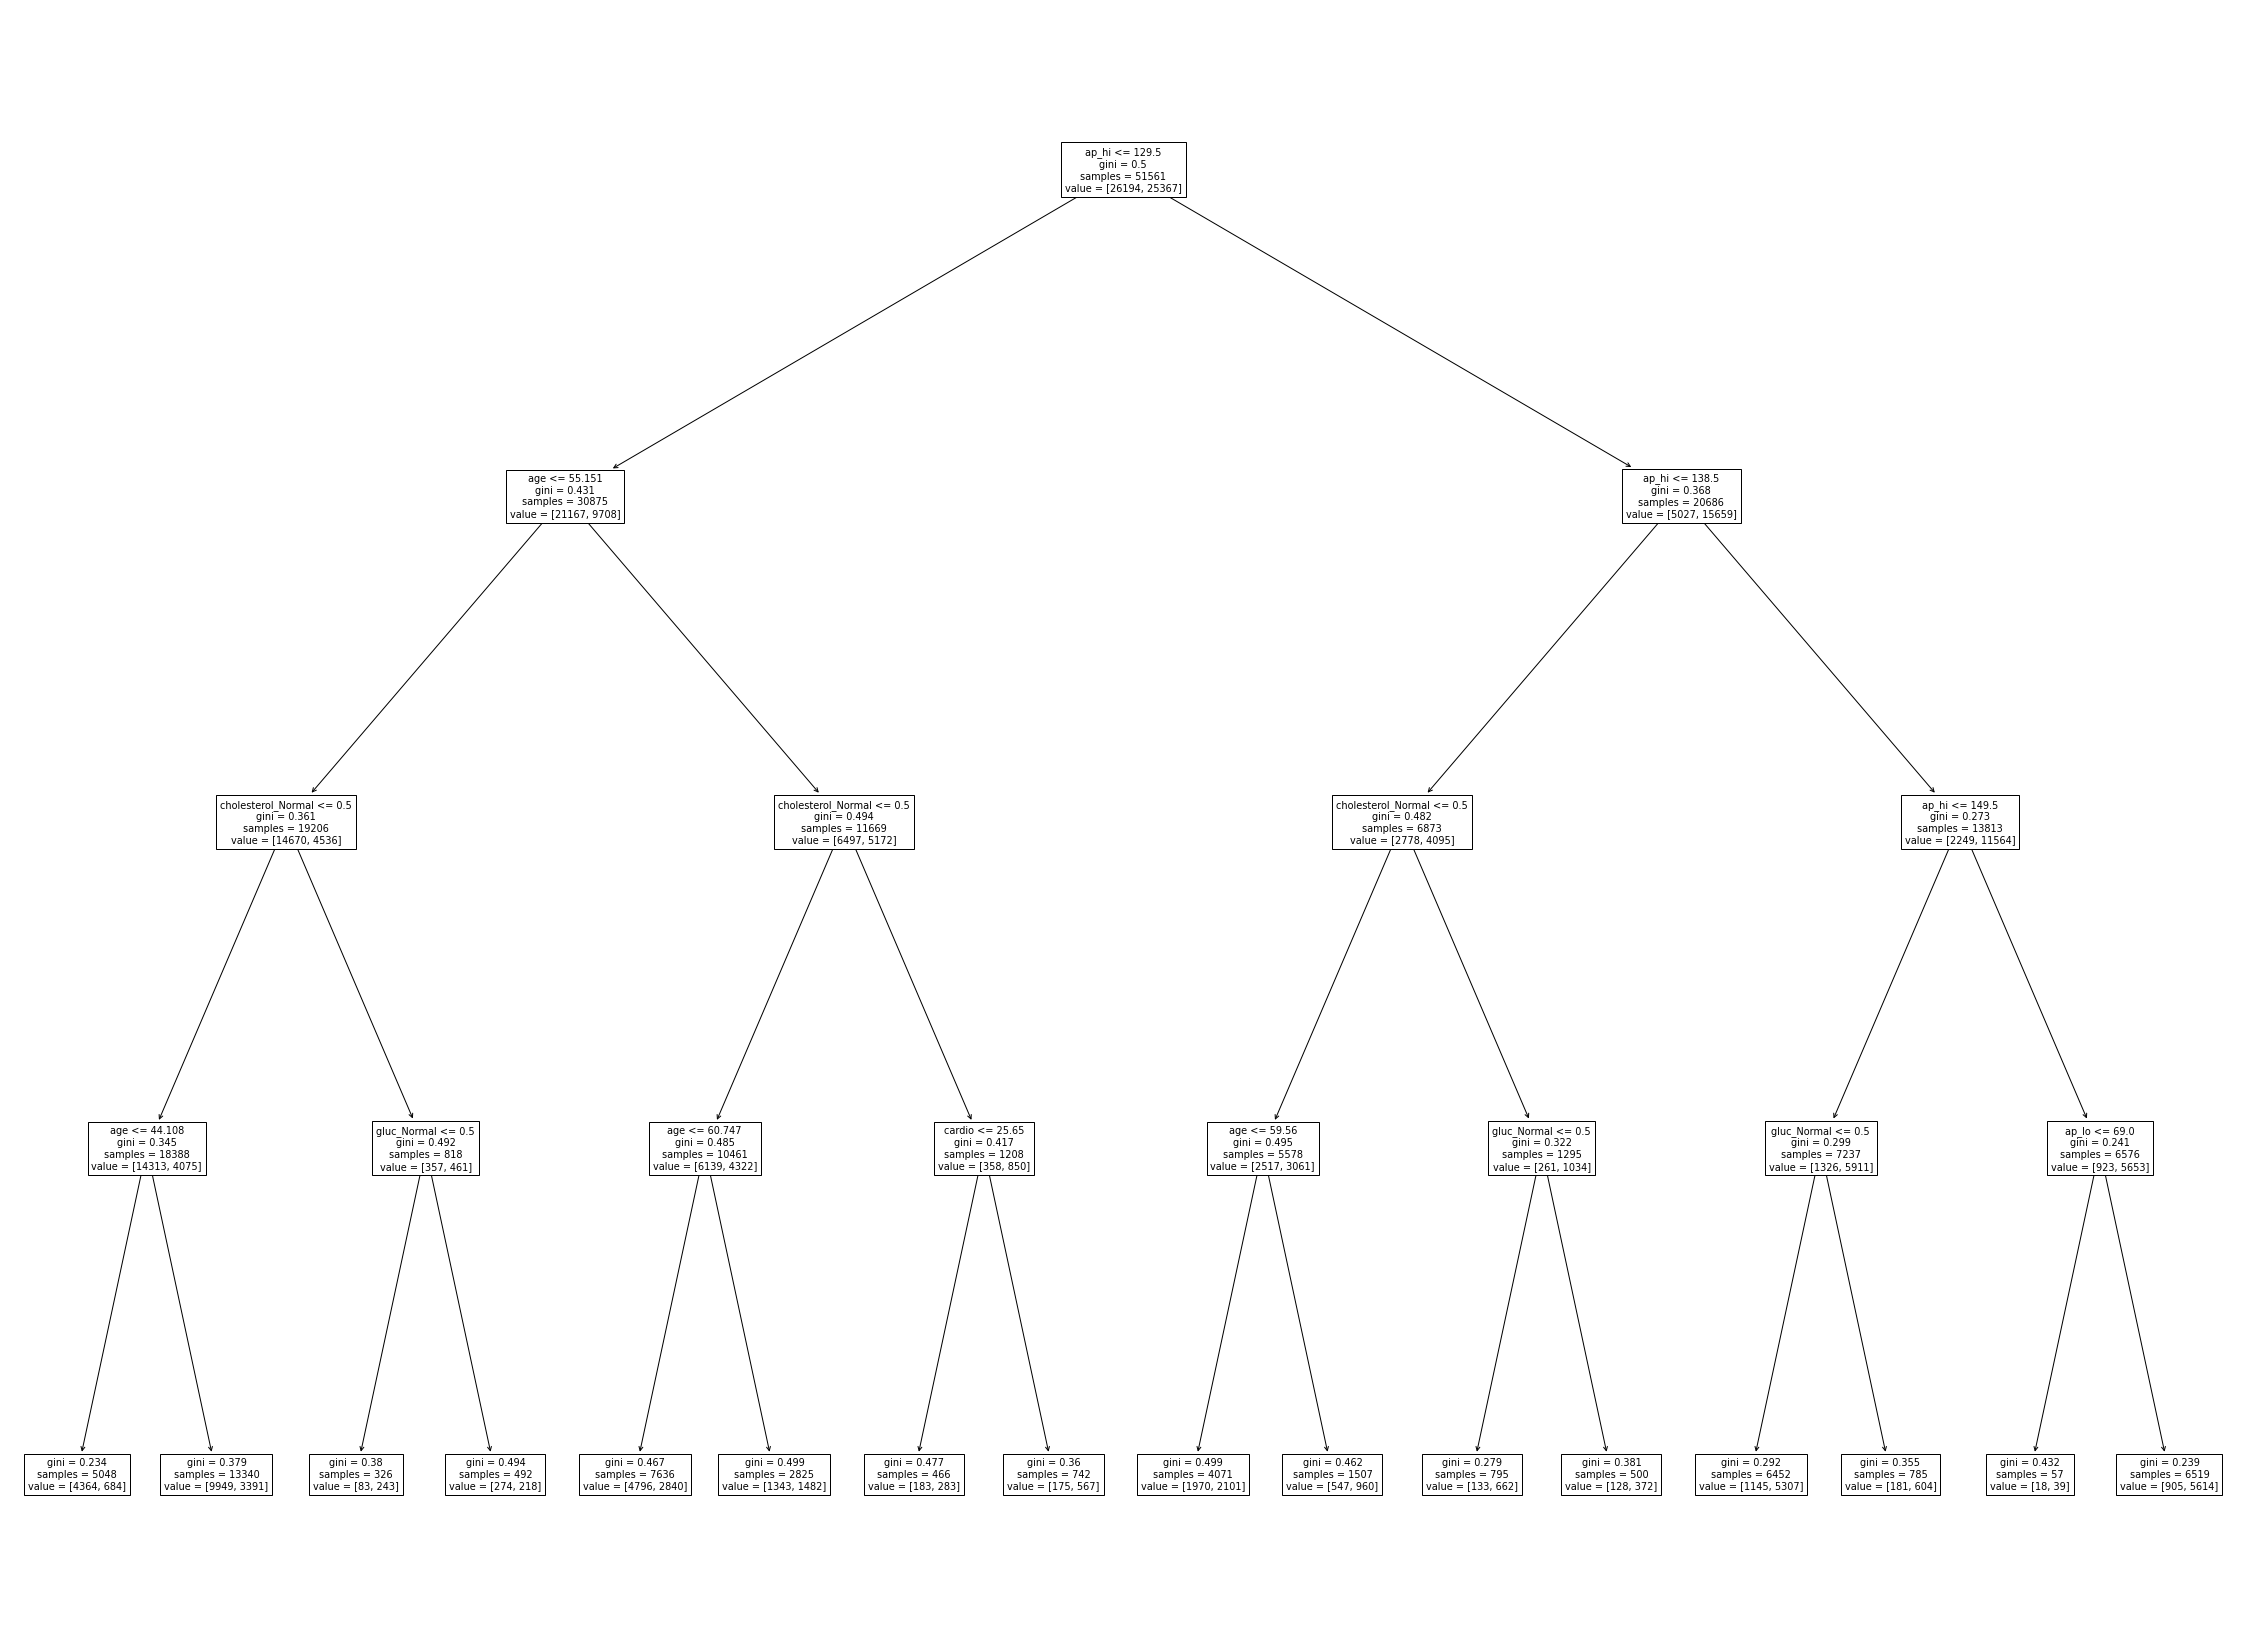

In [17]:
#From the above train and test data we can determine the Decision tree using GINI with depth level 4
Decisiontree = tree.DecisionTreeClassifier(max_depth=4,criterion='gini')
Decisiontree = Decisiontree.fit(A_train,B_train)
B_pred_Gini=Decisiontree.predict(A_test)
fn = list(df.columns)
fig = p.subplots(figsize = (40,30))
print("Accuracy with Gini as hyper Parameter: : ",Decisiontree.score(A_test,B_test, sample_weight=None)*100)
tree.plot_tree(Decisiontree, feature_names = fn);
                  

In [18]:
confusion_matrix_gini=confusion_matrix(B_test, B_pred_Gini)
class_names = ['class 0', 'class 1']
print(confusion_matrix_gini)
print(classification_report(B_test, B_pred_Gini, target_names=class_names))

[[6259 2271]
 [2467 6191]]
              precision    recall  f1-score   support

     class 0       0.72      0.73      0.73      8530
     class 1       0.73      0.72      0.72      8658

    accuracy                           0.72     17188
   macro avg       0.72      0.72      0.72     17188
weighted avg       0.72      0.72      0.72     17188



Accuracy with entropy as hyper parameter :  72.3877123574587


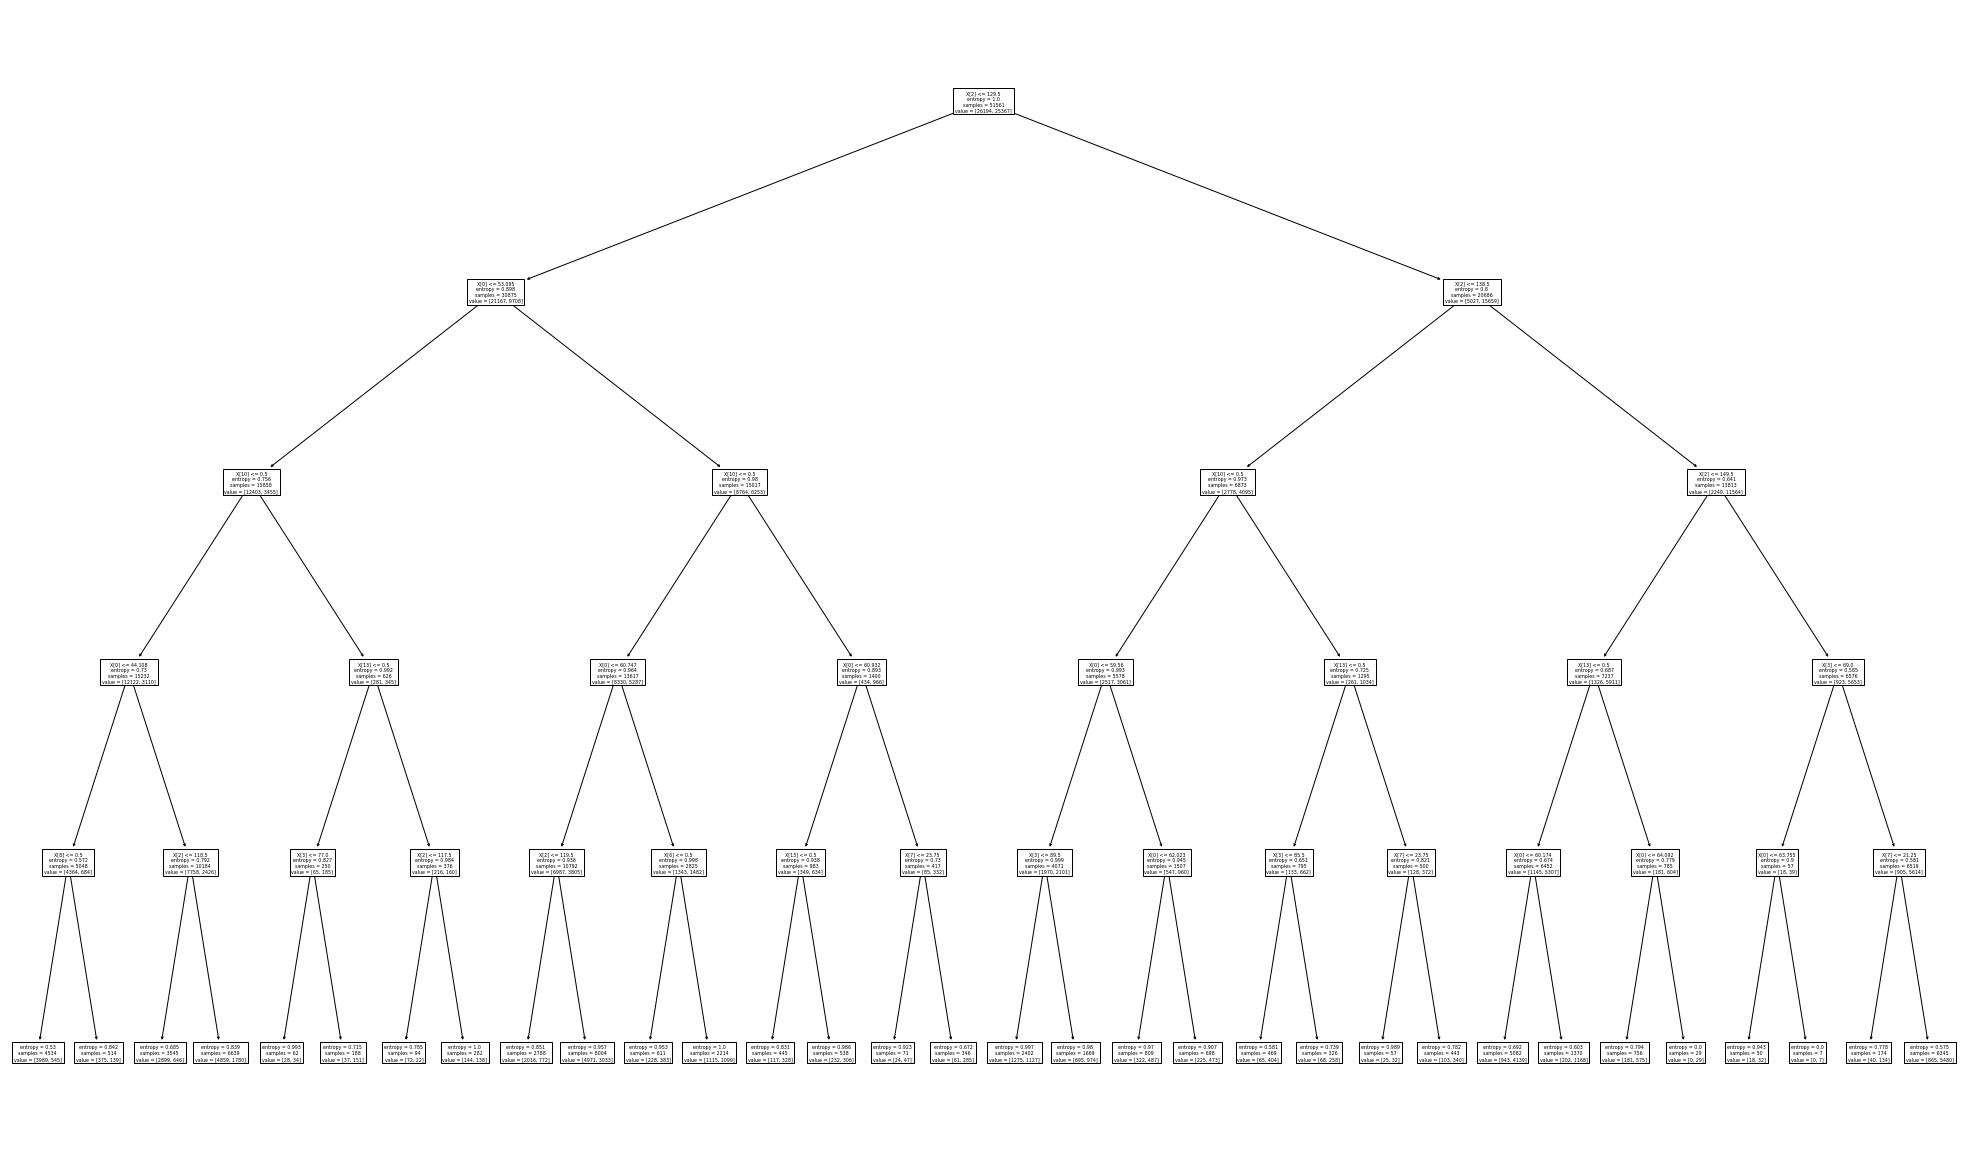

In [19]:
#From the above train and test data we can determine the Decision tree using Entropy with depth level 5
decision_tree = tree.DecisionTreeClassifier(max_depth=5,criterion='entropy')  
decision_tree = decision_tree.fit(A_train,B_train)
B_pred=decision_tree.predict(A_test)
p.figure(figsize=(35,21))
print("Accuracy with entropy as hyper parameter : ",decision_tree.score(A_test,B_test, sample_weight=None)*100)
tree.plot_tree(decision_tree);

In [20]:
confusion_matrix_entropy=confusion_matrix(B_test, B_pred) # printing the confusion matrix and classification report for the above decision tree for each depth
class_names = ['class 0', 'class 1']
print(confusion_matrix_entropy)
print(classification_report(B_test, B_pred, target_names=class_names))

[[7011 1519]
 [3227 5431]]
              precision    recall  f1-score   support

     class 0       0.68      0.82      0.75      8530
     class 1       0.78      0.63      0.70      8658

    accuracy                           0.72     17188
   macro avg       0.73      0.72      0.72     17188
weighted avg       0.73      0.72      0.72     17188



Accuracy with entropy as hyper parameter :  72.40516639515941


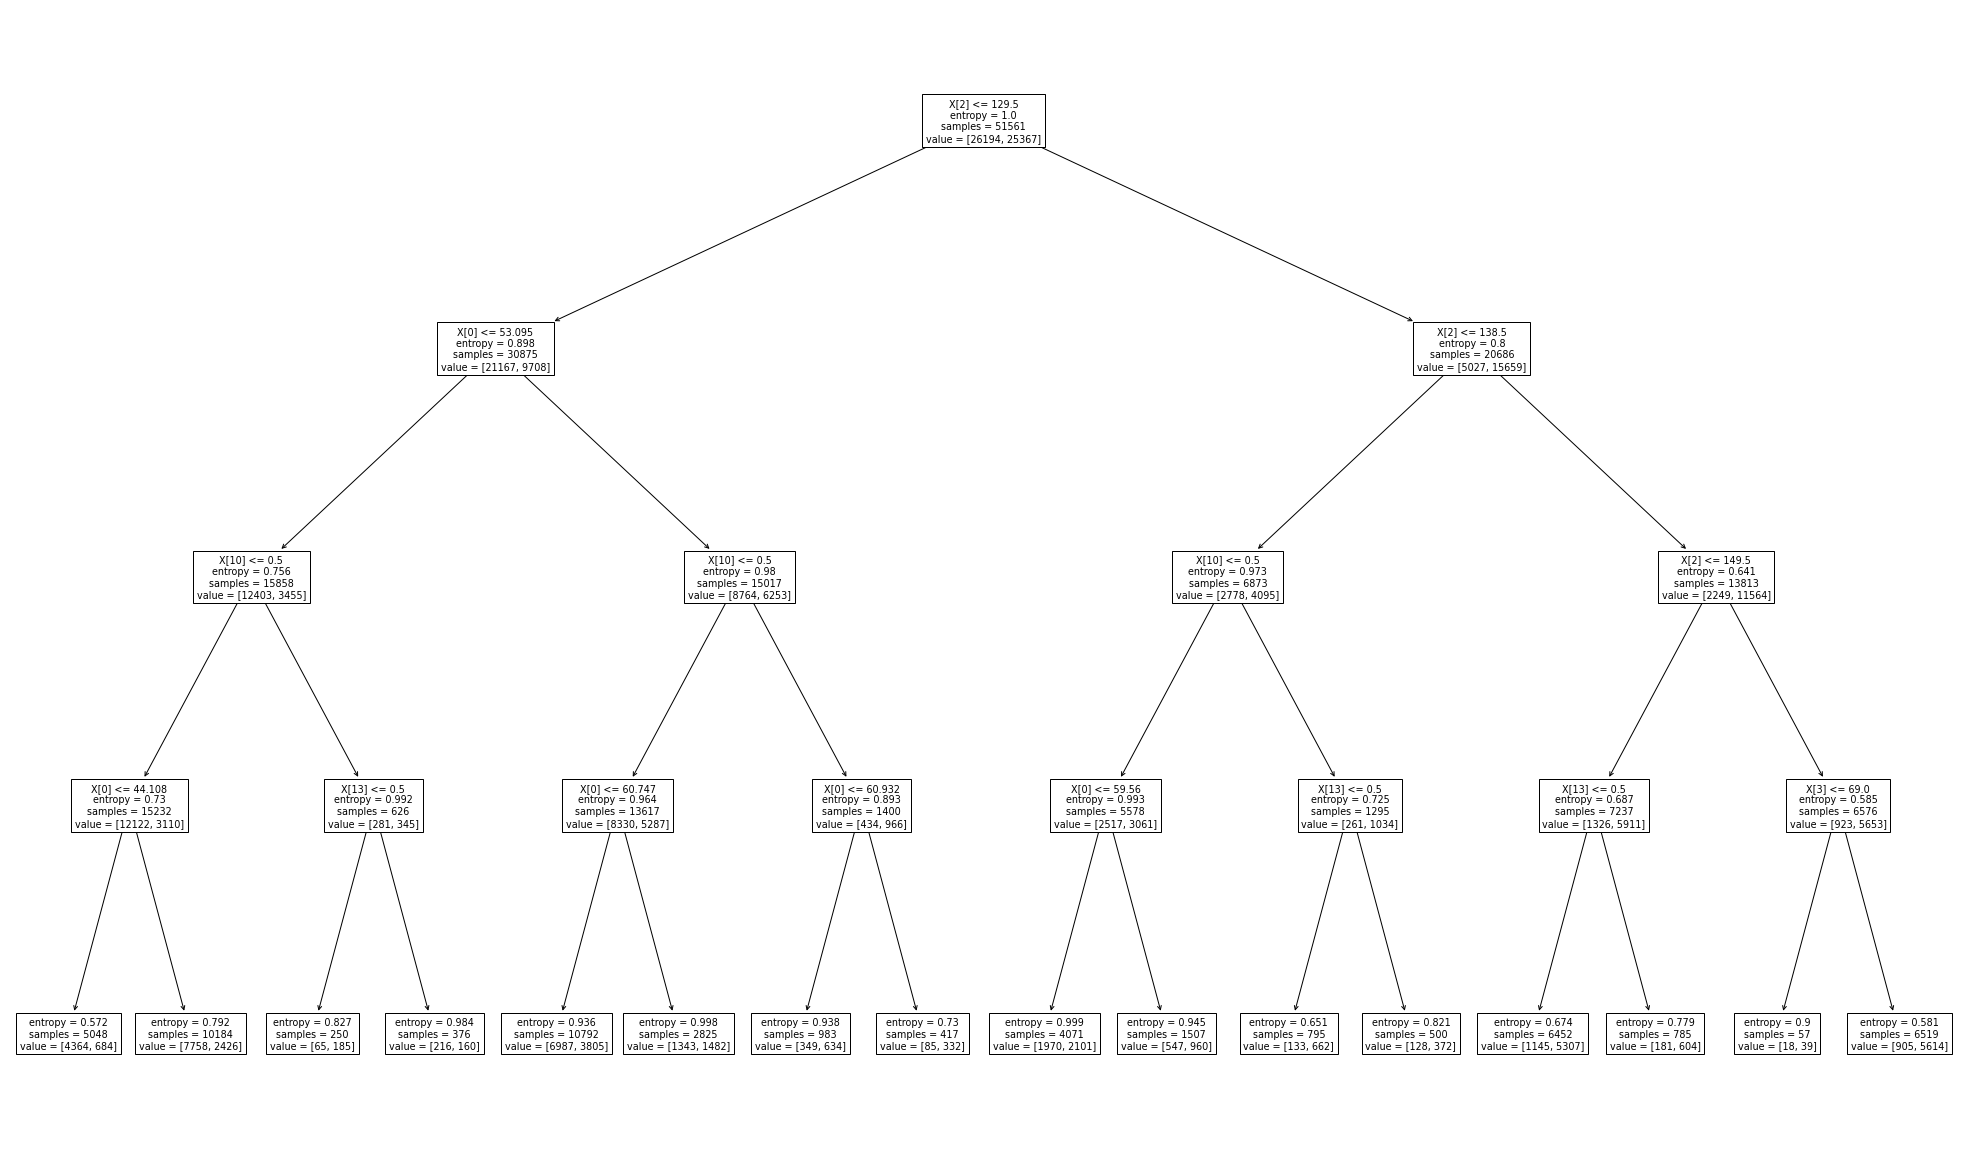

In [21]:
#From the above train and test data we can determine the Decision tree using Entropy with depth level 4
decision_tree = tree.DecisionTreeClassifier(max_depth=4,criterion='entropy')  
decision_tree = decision_tree.fit(A_train,B_train)
B_pred=decision_tree.predict(A_test)
p.figure(figsize=(35,21))
print("Accuracy with entropy as hyper parameter : ",decision_tree.score(A_test,B_test, sample_weight=None)*100)
tree.plot_tree(decision_tree);

In [22]:
confusion_matrix_entropy=confusion_matrix(B_test, B_pred)
class_names = ['class 0', 'class 1']
print(confusion_matrix_entropy)
print(classification_report(B_test, B_pred, target_names=class_names))

[[6237 2293]
 [2450 6208]]
              precision    recall  f1-score   support

     class 0       0.72      0.73      0.72      8530
     class 1       0.73      0.72      0.72      8658

    accuracy                           0.72     17188
   macro avg       0.72      0.72      0.72     17188
weighted avg       0.72      0.72      0.72     17188



In [23]:
#Determine four most influential attributes on target attribute (with explanation) [5 points]
#using feature importance we have gathered the important variables that are influential on decision tree.

feature_dictionary= {}
for col, valu in sorted(zip(A_train.columns, Decisiontree.feature_importances_),key=lambda x:x[1],reverse=True):
  feature_dictionary[col]=valu

In [24]:
feature_dictionary = pd.DataFrame({'Feature':feature_dictionary.keys(),'Importance':feature_dictionary.values()})

In [25]:
feature_dictionary

,Feature,Importance
0,ap_hi,0.792578
1,age,0.125337
2,cholesterol_WellAboveNormal,0.072949
3,gluc_WellAboveNormal,0.006549
4,BMI,0.002067
5,ap_lo,0.000519
6,gender,0.000000
7,smoke,0.000000
8,alco,0.000000
9,active,0.000000


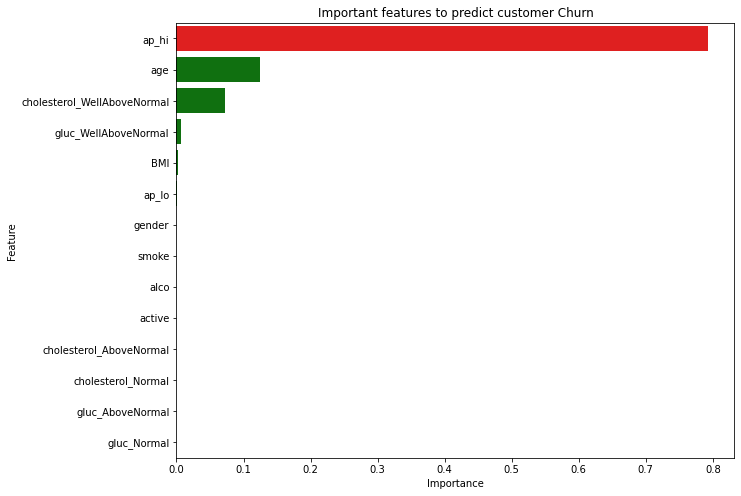

In [26]:
#4 infulential attributes are ap_hi, age, cholesterol_WellAboveNormal, gluc_WellAboveNormal
#visualization
values = feature_dictionary.Importance    
idx = feature_dictionary.Feature
p.figure(figsize=(10,8))
clare = ['green' if (x < max(values)) else 'red' for x in values ]
sns.barplot(y=idx,x=values,palette=clare).set(title='Important features to predict customer Churn')
p.show()

# Naive Bayes (8 Points)


1) Use Naive bayes classifier (Gaussian) to predict the test data[5 point] 


2) Use comments to explain your code and variable names[1 point]


3) Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support).  [2 points]

In [27]:
#By using Naive bays classifier 'GaussianNB()' we can determine the confusion matrix and accuracy for the split data
bayes_model = GaussianNB()  
bayes_model.fit(A_train, B_train)
B_pred = bayes_model.predict(A_test)
print(classification_report(B_test,B_pred))
con_mat=confusion_matrix(B_test,B_pred)
print("Gaussian Naive Bayes model accuracy(in %):", accuracy_score(B_test, B_pred)*100)

              precision    recall  f1-score   support

           0       0.63      0.79      0.70      8530
           1       0.73      0.55      0.63      8658

    accuracy                           0.67     17188
   macro avg       0.68      0.67      0.66     17188
weighted avg       0.68      0.67      0.66     17188

Gaussian Naive Bayes model accuracy(in %): 66.92459855713288


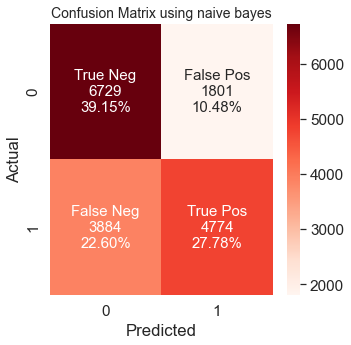

In [28]:
#heat map
groupnames = ['True Neg','False Pos','False Neg','True Pos']
groupcounts = ["{0:0.0f}".format(value) for value in 
                con_mat.flatten()]
grouppercentages = ["{0:.2%}".format(value) for value in 
                     con_mat.flatten()/np.sum(con_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in 
          zip(groupnames,groupcounts,grouppercentages)]
labels = np.asarray(labels).reshape(2,2)
p.figure(figsize=(5,5))
sns.set(font_scale=1.4)
sns.heatmap(con_mat, annot=labels,annot_kws={"size": 15}, fmt='', cmap='Reds')
p.title("Confusion Matrix using naive bayes", fontsize=14);
p.ylabel("Actual")
p.xlabel("Predicted")
p.show()

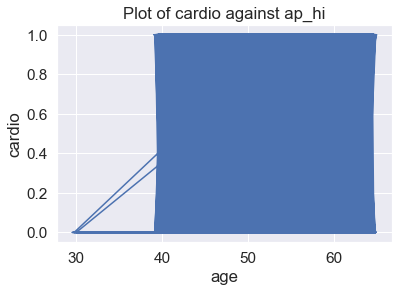

In [29]:
# storing the data frame 'df' in to temparrory varaible df_data1 ang plotting against target variable
df_data1 = df  
p.plot(df_data1.age,df_data1.cardio)
p.xlabel('age')
p.ylabel('cardio')
p.title("Plot of cardio against ap_hi")
p.show()

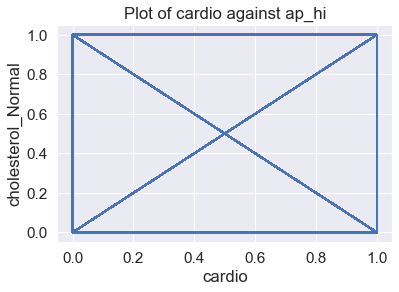

In [30]:
# storing the data frame 'df' in to temparrory varaible df_data1 ang plotting against target variable
df_data1 = df   
p.plot(df_data1.cardio,df_data1.cholesterol_Normal)
p.xlabel('cardio')
p.ylabel('cholesterol_Normal')
p.title("Plot of cardio against ap_hi")
p.show()

## Report (17 Points)

1) Describe the Decision Tree methods, and Naive Bayes classifier. Dont copy paste it from the internet. Write it on your own.  [4 points]

2) Describe the datasets [3 points]  like what do you understand from the dataset? and remember to write down your observation for pre-processing. [2 points]

4) Visualization of the decision tree for gini and entropy.[4 points]

5) Interpret your results, compare gini and entropy. [1 points]

6) Compare the results of DT(gini), DT(entropy) and Naive Bayes. [2 points]

7) Visualize the dataset, for the target variable - 2 graphs [4 points]

Do not to forget to cite your sources!

## Programming Assignment Submission Instructions (2 Points)

### Each file should be submitted separately, do not compress them

For Decision Tree and Naive Bayes:
1.	'yourLastName_Last4digitsofyourID_DT.ipynb' (Report in markdown cells and code in code cells of Notebook preferred)
2.	Report in PDF (optional)

For Nearest Neighbor:
1.	'yourLastName_Last4digitsofyourID_NN.ipynb' (Report in markdown cells and code in code cells of Notebook preferred)
2.	Report in PDF (optional)

### <b>Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn<b>